In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Dataset Extraction from torch vision

In [15]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=6,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=6,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Neural Network

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## TRAINING 

In [21]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)


for epoch in range(20): 
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
    print("EPOCH --> " ,epoch + 1,"   LOSS -->", loss.item() )

print('Finished Training')

EPOCH -->  1    LOSS --> 2.2818617820739746
EPOCH -->  2    LOSS --> 1.689980149269104
EPOCH -->  3    LOSS --> 1.306946039199829
EPOCH -->  4    LOSS --> 1.846136450767517
EPOCH -->  5    LOSS --> 0.7834936380386353
EPOCH -->  6    LOSS --> 1.0041598081588745
EPOCH -->  7    LOSS --> 1.4688303470611572
EPOCH -->  8    LOSS --> 0.8035374283790588
EPOCH -->  9    LOSS --> 1.8553440570831299
EPOCH -->  10    LOSS --> 1.6101362705230713
EPOCH -->  11    LOSS --> 0.9272662401199341
EPOCH -->  12    LOSS --> 0.5478417873382568
EPOCH -->  13    LOSS --> 3.0702576637268066
EPOCH -->  14    LOSS --> 1.066277265548706
EPOCH -->  15    LOSS --> 2.4327924251556396
EPOCH -->  16    LOSS --> 1.3126366138458252
EPOCH -->  17    LOSS --> 2.0512735843658447
EPOCH -->  18    LOSS --> 0.2916834354400635
EPOCH -->  19    LOSS --> 0.6596026420593262
EPOCH -->  20    LOSS --> 0.2096250057220459
Finished Training


## ACCURACY and PREDICATION

In [22]:
data_test_load = iter(testloader)
images_test, labels_test = data_test_load.next()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

Accuracy of the network on the 10000 test images: 60 %


## PREDICATION SHOWED

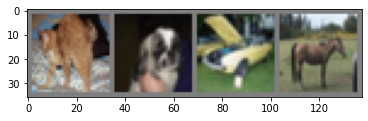

GroundTruth:    cat   dog   car horse
Predicted:    cat   dog   car horse


In [23]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
  
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))